In [1]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
TOPICS_TO_ENG = {
    "Conținut pentru adulți": "Adult content",
    "Artă și design": "Art & Design",
    "Dezvoltare software": "Software development",
    "Crime și investigații": "Crime & Law",
    "Educație și joburi": "Education & Jobs",
    "Electronică și hardware": "Electronics & Hardware",
    "Divertisment": "Entertainment",
    "Viață socială": "Social Life",
    "Modă și frumusețe": "Fashion & Beauty",
    "Finanțe și afaceri": "Finance & Business",
    "Mâncare și băuturi": "Food & Dining",
    "Jocuri": "Games",
    "Sănătate": "Health",
    "Istorie și geografie": "History & Geography",
    "Hobby-uri și casă": "Hobbies & Home",
    "Industrial": "Industrial",
    "Literatură": "Literature",
    "Politică": "Politics",
    "Religie": "Religion",
    "Știință, matematică și tehnologie": "Science, Math & Tech",
    "Software": "Software",
    "Sport și fitness": "Sports & Fitness",
    "Transport": "Transportation",
    "Turism și călătorii": "Travel & Tourism",
}

FORMATS_TO_ENG = {
    "Articol academic": "Academic Writing",
    "Cuprins": "Content Listing",
    "Scriere creativă": "Creative Writing",
    "Pagină de asistență pentru clienți": "Customer Support Page",
    "Forum de discuții": "Discussion Forum",
    "Întrebări frecvente (FAQs)": "FAQs",
    "Conținut incomplet": "Incomplete Content",
    "Articol de cunoștințe": "Knowledge Article",
    "Notificări legale": "Legal Notices",
    "Articol de tip listă": "Listicle",
    "Articol de știri": "News Article",
    "Scriere non-ficțiune": "Nonfiction Writing",
    "Pagină despre organizație": "Org. About Page",
    "Anunț organizațional": "Org. Announcement",
    "Pagină personală": "Personal About Page",
    "Blog personal": "Personal Blog",
    "Pagină de produs": "Product Page",
    "Forum întrebări și răspunsuri": "Q&A Forum",
    "Spam și reclame": "Spam / Ads",
    "Date structurate": "Structured Data",
    "Scriere tehnică": "Technical Writing",
    "Transcriere sau interviu": "Transcript / Interview",
    "Tutorial sau ghid": "Tutorial",
    "Recenzii ale utilizatorilor": "User Reviews",
}

AGE_GROUPS_TO_ENG = {
    'Preșcolar': 'Preschool',
    'Școală primară': 'Primary School',
    'Școală gimnazială': 'Middle School',
    'Liceu': 'High School',
    "Licență": "Undergraduate",
    "Post-universitar": "Postgraduate",
}

In [4]:
with open("summary.json", 'r') as file:
    data = json.load(file)

In [5]:
with open("edu.json", 'r') as file:
    edu_scores = json.load(file)

with open("counts_edu.json", 'r') as file:
    edu_counts = json.load(file)

In [6]:
scores = data['score']
_topics = data['topic']
_formats = data['format']
_age_groups = data['age_group']

def reorder(counts_dict, order):
    return {k: counts_dict.get(k, 0) for k in order}

topics = reorder(_topics, list(TOPICS_TO_ENG.keys()))
formats = reorder(_formats, list(FORMATS_TO_ENG.keys()))
age_groups = reorder(_age_groups, list(AGE_GROUPS_TO_ENG.keys()))

edu_topics = reorder(edu_counts['topic'], list(TOPICS_TO_ENG.keys()))
edu_formats = reorder(edu_counts['format'], list(FORMATS_TO_ENG.keys()))

print(len(edu_scores), len(scores), len(topics), len(formats), len(age_groups))
print(topics)
print(formats)
print(age_groups)
print(edu_topics)
print(edu_formats)

1000000 54128784 24 24 6
{'Conținut pentru adulți': 750527, 'Artă și design': 715495, 'Dezvoltare software': 97967, 'Crime și investigații': 2815684, 'Educație și joburi': 2171714, 'Electronică și hardware': 1614566, 'Divertisment': 4333356, 'Viață socială': 1632922, 'Modă și frumusețe': 2455098, 'Finanțe și afaceri': 5522660, 'Mâncare și băuturi': 2001106, 'Jocuri': 935057, 'Sănătate': 5865211, 'Istorie și geografie': 1133898, 'Hobby-uri și casă': 2604779, 'Industrial': 796227, 'Literatură': 1525477, 'Politică': 6542554, 'Religie': 1432882, 'Știință, matematică și tehnologie': 1471944, 'Software': 448641, 'Sport și fitness': 3431341, 'Transport': 1917275, 'Turism și călătorii': 1912403}
{'Articol academic': 68500, 'Cuprins': 225205, 'Scriere creativă': 827191, 'Pagină de asistență pentru clienți': 132097, 'Forum de discuții': 577250, 'Întrebări frecvente (FAQs)': 75266, 'Conținut incomplet': 2799, 'Articol de cunoștințe': 3370700, 'Notificări legale': 227306, 'Articol de tip listă': 4

In [7]:
print(formats['Articol de știri'] / sum(formats.values()))
print(edu_formats['Articol de știri'] / sum(edu_formats.values()))

0.4747818277240442
0.18295


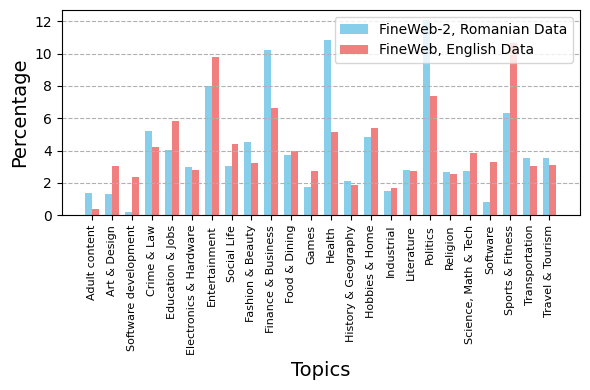

In [8]:
total = sum(topics.values()) / 100 # identical for formats and age_groups
edu_total_topic = sum(edu_topics.values()) / 100
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(topics))

bar1 = ax.bar(index - bar_width/2, [topic / total for topic in topics.values()], bar_width, label='FineWeb-2, Romanian Data', color='skyblue')
bar2 = ax.bar(index + bar_width/2, [topic / edu_total_topic for topic in edu_topics.values()], bar_width, label='FineWeb, English Data', color='lightcoral')
ax.set_xlabel('Topics', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels([TOPICS_TO_ENG[topic] for topic in edu_topics.keys()], rotation=90, ha='center', fontsize=8)
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/topics_comparison.png', dpi=500)
plt.show()

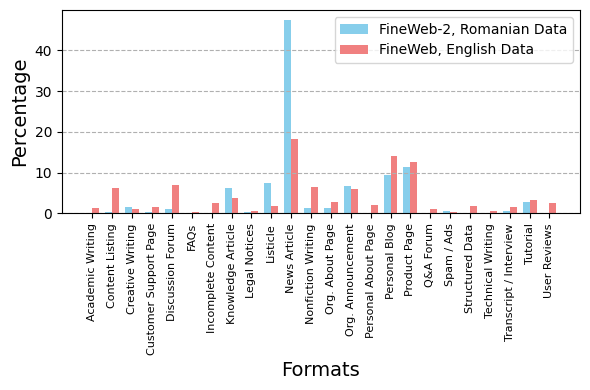

In [9]:
total = sum(formats.values()) / 100 # identical for formats and age_groups
edu_total_format = sum(edu_formats.values()) / 100
fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(formats))

bar1 = ax.bar(index - bar_width/2, [fmt / total for fmt in formats.values()], bar_width, label='FineWeb-2, Romanian Data', color='skyblue')
bar2 = ax.bar(index + bar_width/2, [fmt / edu_total_format for fmt in edu_formats.values()], bar_width, label='FineWeb, English Data', color='lightcoral')
ax.set_xlabel('Formats', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
# ax.set_title('Comparison of Normalized Scores Across Topics')
ax.set_xticks(index)
ax.set_xticklabels([FORMATS_TO_ENG[fmt] for fmt in edu_formats.keys()], rotation=90, ha='center', fontsize=8)
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/formats_comparison.png', dpi=500)
plt.show()

In [10]:
with open("filtered_counts_3_5.json", 'r') as file:
    filtered_counts = json.load(file)

filtered_topics = reorder(filtered_counts['topic'], list(TOPICS_TO_ENG.keys()))
filtered_formats = reorder(filtered_counts['format'], list(FORMATS_TO_ENG.keys()))

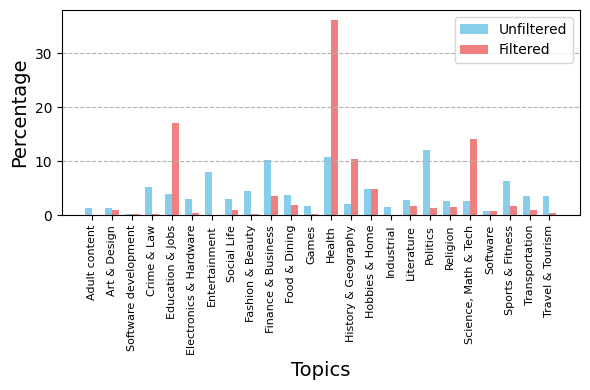

In [11]:
total = sum(topics.values()) / 100
filtered_total = sum(filtered_topics.values()) / 100

fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(topics))

bar1 = ax.bar(index - bar_width/2, [val / total for val in topics.values()],
              bar_width, label='Unfiltered', color='skyblue')
bar2 = ax.bar(index + bar_width/2, [val / filtered_total for val in filtered_topics.values()],
              bar_width, label='Filtered', color='lightcoral')

ax.set_xlabel('Topics', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels([TOPICS_TO_ENG[topic] for topic in topics.keys()], rotation=90, ha='center', fontsize=8)
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/topics_filtered_comparison.png', dpi=500)
plt.show()

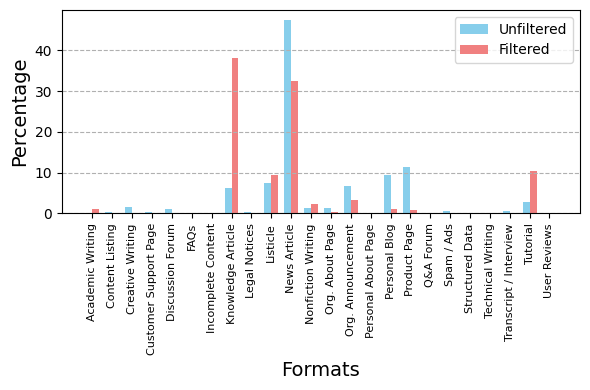

In [12]:
total = sum(formats.values()) / 100
filtered_total = sum(filtered_formats.values()) / 100

fig, ax = plt.subplots(figsize=(6, 4))
bar_width = 0.35
index = np.arange(len(formats))

bar1 = ax.bar(index - bar_width/2, [val / total for val in formats.values()],
              bar_width, label='Unfiltered', color='skyblue')
bar2 = ax.bar(index + bar_width/2, [val / filtered_total for val in filtered_formats.values()],
              bar_width, label='Filtered', color='lightcoral')

ax.set_xlabel('Formats', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticks(index)
ax.set_xticklabels([FORMATS_TO_ENG[fmt] for fmt in formats.keys()], rotation=90, ha='center', fontsize=8)
ax.legend()
ax.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('../photos/formats_filtered_comparison.png', dpi=500)
plt.show()

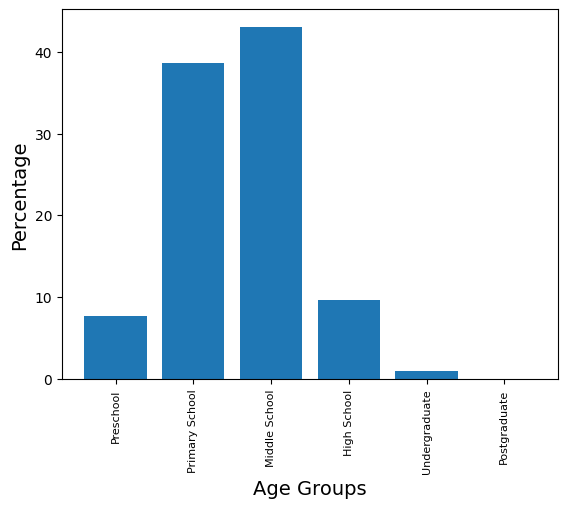

In [16]:
from tkinter import font


plt.bar([AGE_GROUPS_TO_ENG[age_group] for age_group in age_groups.keys()], [x / total for x in age_groups.values()])
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Percentage', fontsize=14)
plt.xlabel('Age Groups', fontsize=14)
plt.savefig('../photos/edu_level.png', dpi=500)
plt.show()

KeyboardInterrupt: 

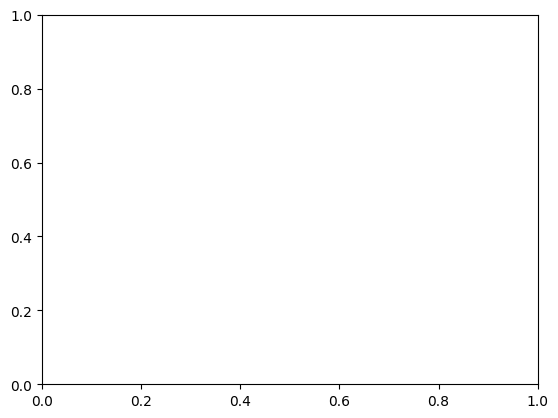

In [ ]:
sns.histplot(scores, bins=40, kde=True, stat="percent", label="FineWeb-2, Romanian Data", color="skyblue")
sns.histplot(edu_scores, bins=40, kde=True, stat="percent", label="FineWeb, English Data", color="coral")

plt.xlabel('Educational Score')
plt.ylabel('Percentage')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('../photos/score_comparison.png', dpi=500)
plt.show()

In [8]:
base_scores = {
    "ARC": 36.05,
    "MMLU": 33.66,
    "HellaSwag": 48.00,
}

# 54128784 documents (all)
# 33.5B tokens
# batch 1024, max_length 4096
# 5000 steps -> 5000 * 1024 = 5120000 documents
# equivalent tokens = (5120000 / 54128784) * 33.5B = 3.17B
# Mean tokens per step = 1030 (mean tokens per example) * 1024 (batch size) = 1054720
fineweb2_scores = {
    "mean_tokens_per_step": 1054720,
    "steps": [1000, 2000, 3000, 4000, 5000],
    "ARC": [37.70, 38.49, 39.30, 39.10, 38.83],
    "MMLU": [31.39, 30.97, 30.17, 30.43, 27.77],
    "HellaSwag": [55.99, 57.21, 56.20, 57.41, 57.44],
}
fineweb2_scores['tokens'] = [
    fineweb2_scores['mean_tokens_per_step'] * step for step in fineweb2_scores['steps']
]

# 3883932 documents
# 6.42B tokens
# batch 1024, max_length 4096
# documents / batch = 3793 steps
# mean_tokens_per_step = 6.42B / 3793 = 1692591.6
fineweb2_roedu_scores = {
    "mean_tokens_per_step": 1692591.6,
    "steps": [400, 800, 1200, 1600, 2000, 2400, 2800, 3200, 3600],
    "ARC": [39.89, 40.33, 41.11, 40.64, 41.44, 42.55, 42.40, 43.12, 42.57],
    "MMLU": [32.56, 30.34, 30.41, 32.11, 32.99, 31.83, 31.91, 31.82, 32.38],
    "HellaSwag": [56.42, 57.55, 57.61, 58.25, 59.08, 59.71, 59.50, 59.86, 59.88],
}
fineweb2_roedu_scores['tokens'] = [
    fineweb2_roedu_scores['mean_tokens_per_step'] * step for step in fineweb2_roedu_scores['steps']
]


# 2738993 documents
# 6.23B tokens
# batch 1024, max_length 4096
# documents / batch = 2675 steps
# mean_tokens_per_step = 6.23B / 2675 = 2328971.96262
jql_scores = {
    "mean_tokens_per_step": 2328971.96262,
    "steps": [400, 800, 1200, 1600, 2000, 2400],
    "ARC": [39.02, 39.75, 40.26, 40.60, 40.42, 40.56],
    "MMLU": [32.03, 30.32, 33.33, 30.81, 32.16, 32.51],
    "HellaSwag": [56.56, 57.05, 57.87, 58.02, 58.45, 58.72],
}

jql_scores['tokens'] = [
    jql_scores['mean_tokens_per_step'] * step for step in jql_scores['steps']
]

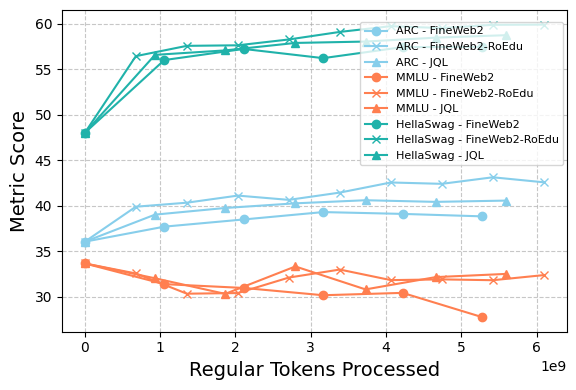

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["ARC"]] + fineweb2_scores["ARC"], marker='o', label="ARC - FineWeb2", color='skyblue')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["ARC"]] + fineweb2_roedu_scores["ARC"], marker='x', label="ARC - FineWeb2-RoEdu", color='skyblue')
ax.plot([0] + jql_scores["tokens"], [base_scores["ARC"]] + jql_scores["ARC"], marker='^', label="ARC - JQL", color='skyblue')

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["MMLU"]] + fineweb2_scores["MMLU"], marker='o', label="MMLU - FineWeb2", color='coral')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["MMLU"]] + fineweb2_roedu_scores["MMLU"], marker='x', label="MMLU - FineWeb2-RoEdu", color='coral')
ax.plot([0] + jql_scores["tokens"], [base_scores["MMLU"]] + jql_scores["MMLU"], marker='^', label="MMLU - JQL", color='coral')

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["HellaSwag"]] + fineweb2_scores["HellaSwag"], marker='o', label="HellaSwag - FineWeb2", color='lightseagreen')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["HellaSwag"]] + fineweb2_roedu_scores["HellaSwag"], marker='x', label="HellaSwag - FineWeb2-RoEdu", color='lightseagreen')
ax.plot([0] + jql_scores["tokens"], [base_scores["HellaSwag"]] + jql_scores["HellaSwag"], marker='^', label="HellaSwag - JQL", color='lightseagreen')


ax.set_xlabel("Regular Tokens Processed", fontsize=14)
ax.set_ylabel("Metric Score", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(0.58, 0.5), fontsize=8)
plt.tight_layout()
plt.savefig('../photos/pretraining.png', dpi=500)
plt.show()

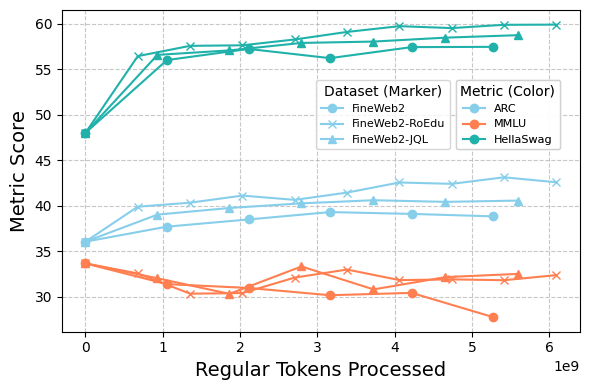

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["ARC"]] + fineweb2_scores["ARC"], marker='o', color='skyblue')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["ARC"]] + fineweb2_roedu_scores["ARC"], marker='x', color='skyblue')
ax.plot([0] + jql_scores["tokens"], [base_scores["ARC"]] + jql_scores["ARC"], marker='^', color='skyblue')

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["MMLU"]] + fineweb2_scores["MMLU"], marker='o', color='coral')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["MMLU"]] + fineweb2_roedu_scores["MMLU"], marker='x', color='coral')
ax.plot([0] + jql_scores["tokens"], [base_scores["MMLU"]] + jql_scores["MMLU"], marker='^', color='coral')

ax.plot([0] + fineweb2_scores["tokens"], [base_scores["HellaSwag"]] + fineweb2_scores["HellaSwag"], marker='o', color='lightseagreen')
ax.plot([0] + fineweb2_roedu_scores["tokens"], [base_scores["HellaSwag"]] + fineweb2_roedu_scores["HellaSwag"], marker='x', color='lightseagreen')
ax.plot([0] + jql_scores["tokens"], [base_scores["HellaSwag"]] + jql_scores["HellaSwag"], marker='^', color='lightseagreen')

ax.set_xlabel("Regular Tokens Processed", fontsize=14)
ax.set_ylabel("Metric Score", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

# Legend for markers (model/dataset)
marker_legend = ax.legend(
    [
        ax.lines[0],  # o - FineWeb2
        ax.lines[1],  # x - FineWeb2-RoEdu
        ax.lines[2],  # ^ - FineWeb2-JQL
    ],
    ["FineWeb2", "FineWeb2-RoEdu", "FineWeb2-JQL"],
    title="Dataset (Marker)",
    bbox_to_anchor=(0.48, 0.8),
    loc="upper left",
    fontsize=8,
)
ax.add_artist(marker_legend)

# Legend for colors (metric)
color_legend = ax.legend(
    [
        ax.lines[0],  # skyblue - ARC
        ax.lines[3],  # coral - MMLU
        ax.lines[6],  # lightseagreen - HellaSwag
    ],
    ["ARC", "MMLU", "HellaSwag"],
    title="Metric (Color)",
    bbox_to_anchor=(0.75, 0.8),
    loc="upper left",
    fontsize=8,
)
ax.add_artist(color_legend)

plt.tight_layout()
plt.savefig('../photos/pretraining.png', dpi=500)
plt.show()

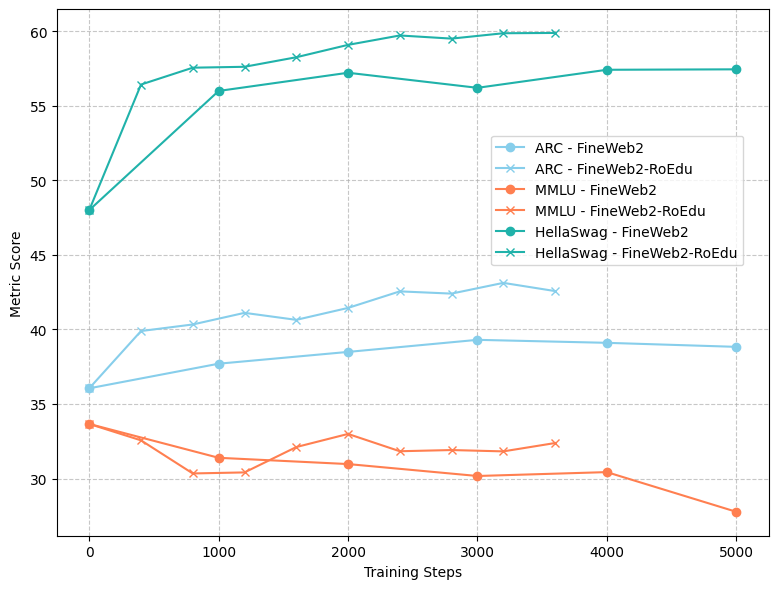

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot([0] + fineweb2_scores["steps"], [base_scores["ARC"]] + fineweb2_scores["ARC"], marker='o', label="ARC - FineWeb2", color='skyblue')
ax.plot([0] + fineweb2_roedu_scores["steps"], [base_scores["ARC"]] + fineweb2_roedu_scores["ARC"], marker='x', label="ARC - FineWeb2-RoEdu", color='skyblue')

ax.plot([0] + fineweb2_scores["steps"], [base_scores["MMLU"]] + fineweb2_scores["MMLU"], marker='o', label="MMLU - FineWeb2", color='coral')
ax.plot([0] + fineweb2_roedu_scores["steps"], [base_scores["MMLU"]] + fineweb2_roedu_scores["MMLU"], marker='x', label="MMLU - FineWeb2-RoEdu", color='coral')

ax.plot([0] + fineweb2_scores["steps"], [base_scores["HellaSwag"]] + fineweb2_scores["HellaSwag"], marker='o', label="HellaSwag - FineWeb2", color='lightseagreen')
ax.plot([0] + fineweb2_roedu_scores["steps"], [base_scores["HellaSwag"]] + fineweb2_roedu_scores["HellaSwag"], marker='x', label="HellaSwag - FineWeb2-RoEdu", color='lightseagreen')


ax.set_xlabel("Training Steps")
ax.set_ylabel("Metric Score")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(bbox_to_anchor=(0.6, 0.5))
plt.tight_layout()
plt.savefig('../photos/pretraining_steps.png', dpi=500)
plt.show()